# Анализ исторических данных о продажах игр. Закономерности определяющие успешность игр. 

**Задачи проекта**

Для интернет-магазина, который продаёт по всему миру компьютерные игры,
<br>**необходимо выявить определяющие успешность игры закономерности**. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании в 2017 году. 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

**План исследования:**
* [Изучение общей информации о данных](#chapter1)
* [Предобработка данных](#chapter2)
    * [Замена названий столбцов](#section_2_1)
    * [Обработка пропусков](#section_2_2)
    * [Проверка наличия дубликатов](#section_2_3)
    * [Преобразование данных в нужные типы](#section_2_4)
* [Исследовательский анализ данных](#chapter3)
    * [Суммарные продажи во всех регионах](#section_3_1)
    * [Выпуск игр в разные годы](#section_3_2)
    * [Изменение продаж по платформам, выбор актуального периода для анализа](#section_3_3)
    * [Выбор  потенциально прибыльных платформ](#section_3_4)
    * [Влияние  отзывов пользователей и критиков на продажи ](#section_3_5)
    * [Общее распределение игр по жанрам, самые прибыльные жанры](#section_3_6)
* [Портрет пользователя каждого региона](#chapter4)
    * [Популярные платформы среди пользователей каждого региона](#section_4_1)
    * [Самые популярные жанры для каждого региона](#section_4_2)
    * [Влияние рейтинга ESRB на продажи в отдельном регионе](#section_4_3)
* [Проверка гипотез](#chapter5)
    * [Пользовательские рейтинги платформ Xbox One и PC одинаковые](#section_5_1)
    * [Пользовательские рейтинги жанров Action  и Sports  - разные](#section_5_2)
* [Общий вывод и рекомендации](#chapter6)

### Изучение общей информации о данных  <a class="anchor" id="chapter1"></a>

Открою файл с данными и изучу общую информацию:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
from scipy.stats import binom
from math import sqrt
from scipy import stats as st

In [2]:
data = pd.read_csv('/Users/k_kopeikin/Documents/Projects/Проекты Python/success_of_games/games.csv')

In [3]:
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:**

   Для анализа имею датасет, где всего 16715 строк, но в некоторых столбцах строк с ненулевыми значениями сильно меньше, например столбцы 'Critic_Score', 'User_Score'  и 'Rating' имеют 8137, 10014 и 9949  значений соответственно - необхдимо обработать пропуски.
   
   Также названия столбцов содержат заглавные буквы - необходимо привести к нижнему регистру. 
   
   Кроме того, в столбцe 'User_Score' необходимо изменить типы данных.

###  Предобработка данных<a id="chapter2"></a>

##### Замена названий столбцов<a id="section_2_1"></a>

Приведу названия столбцов и содержимое категориальных колонок('name', 'platform', 'genre','Rating') к нижнему регистру:

In [5]:
data.columns = data.columns.str.lower()
columns = ['name', 'platform', 'genre','rating']
for column in columns:
    data[column] = data[column].str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


##### Обработка пропусков<a id="section_2_2"></a>

Посмотрю количество пропусков:

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Строки с пропущенными значениями в столбце  'name'  - удалю, поскольку неизвестно что это за игры, предварительно проверив как много копий было продано для этих игр. 

In [7]:
data[data['name'].isnull() == True].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце 'year_of_release' 269 пропусков, что составляет примерно 1,61% от общего числа строк - поскольку далее даты выпуска будут активно использоваться для анализа удалю строки с пропусками в датах релиза, предварительно проверив как много копий было продано для этих игр: 

In [8]:
data[data['year_of_release'].isnull() == True].head().sort_values(by='na_sales',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e


In [9]:
data.dropna(subset = ['name','year_of_release'], inplace=True)

Пропуски в столбце 'rating' заменю на 'no rating':

In [10]:
data['rating'] = data.rating.fillna(value='no rating')

Пропуски в столбцах 'critic_score' и 'user_score'  - оставлю, поскольку  оценку или рейтинг конкретной игры нелогично заменять средним или медианой. 

Чтобы выявить возможные причины этих пропусков посмотрю на эти строки:

In [11]:
data[data['critic_score'].isnull() == True].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no rating
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,no rating
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,no rating
12,pokemon gold/pokemon silver,gb,1999.0,role-playing,9.00,6.18,7.20,0.71,NaN,NaN,no rating
18,super mario world,snes,1990.0,platform,12.78,3.75,3.54,0.55,NaN,NaN,no rating
20,pokemon diamond/pokemon pearl,ds,2006.0,role-playing,6.38,4.46,6.04,1.36,NaN,NaN,no rating
21,super mario land,gb,1989.0,platform,10.83,2.71,4.18,0.42,NaN,NaN,no rating
22,super mario bros. 3,nes,1988.0,platform,9.54,3.44,3.84,0.46,NaN,NaN,no rating


Явных причин пропусков данных в столбцах 'critic_score','user_score' и 'rating' выявить не удалось.

##### Проверка наличия дубликатов<a id="section_2_3"></a>

Проверю датасет на дубликаты:

In [12]:
data.duplicated().sum()

0

Проверю дубликаты по сумме параметров ('name', 'platform', 'year_of_release'):

In [13]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()


1

Найдено 2 строчки неполных дубликатов - удалю их:

In [14]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first').reset_index(drop=True)

##### Преобразование данных в нужные типы<a id="section_2_4"></a>

Посмотрю значения в столбцe 'user_score':  

In [15]:
data.user_score.unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди данных есть строковое значение 'tbd'(которое не подзволяет изменить тип данных), что означает - To Be Decided (будет решено). Интернет подсказывает, данная аббревиатура используется если какая-то информация еще не определена или решение по вопросу не принято. 

Заменю 'tbd' пропусками и после изменю тип данных :

In [16]:
data.user_score = data.user_score.replace('tbd', np.nan).astype('float')

In [17]:
data.year_of_release = data.year_of_release.astype('int')

In [18]:
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

**Вывод:**

Данные подготовлены для последующего анализа. 

В рамках предобработки были удалены пропуски в столбцах  'name' и 'year_of_release'. Пропуски в столбце 'rating' - были заполнены. Причины пропусков данных в столбцах 'critic_score' и 'user_score' выявить не удалось, пропуски в этих столбах были оставлены.

Явных дубликатов в данных обнаружено не было. Была проведена проверка на  дубликаты по сумме параметров ('name', 'platform', 'year_of_release') - выявленные дубликаты удалены

В столбцах 'user_score' и 'year_of_release'был изменен тип данных.

### Исследовательский анализ данных<a id="chapter3"></a>

##### Суммарные продажи во всех регионах<a id="section_3_1"></a>

Посчитаю суммарные продажи во всех регионах и запишу их в отдельный столбец:

In [19]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

##### Выпуск игр в разные годы<a id="section_3_2"></a>

Посмотрю, сколько игр выпускалось в разные годы:

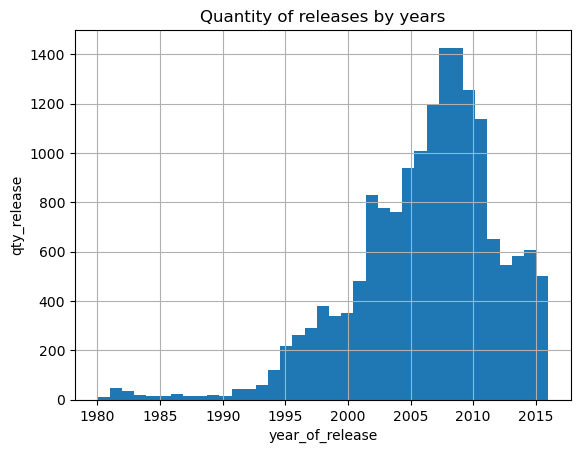

In [20]:
qty_release_by_year = data.year_of_release.hist(bins=(data.year_of_release.max() - data.year_of_release.min()+1));
plt.title("Quantity of releases by years")
plt.xlabel("year_of_release")
plt.ylabel("qty_release");

In [21]:
data.year_of_release.describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Более 75 процентов всех игр из датасета были выпущены после 2002 года. Возможно далее для анализа стоит использовать только данные после 2002, поскольку индустрия игр меняется очень быстро.

##### Платформы с наибольшими суммарными продажами, изменение продаж по платформам, выбор актуального периода для анализа<a id="section_3_3"></a>

Посмотрю, как менялись продажи по платформам. Для этого сначала сгруппирую данные по платформам и посмотрю платформы с наибольшими суммарными продажами:

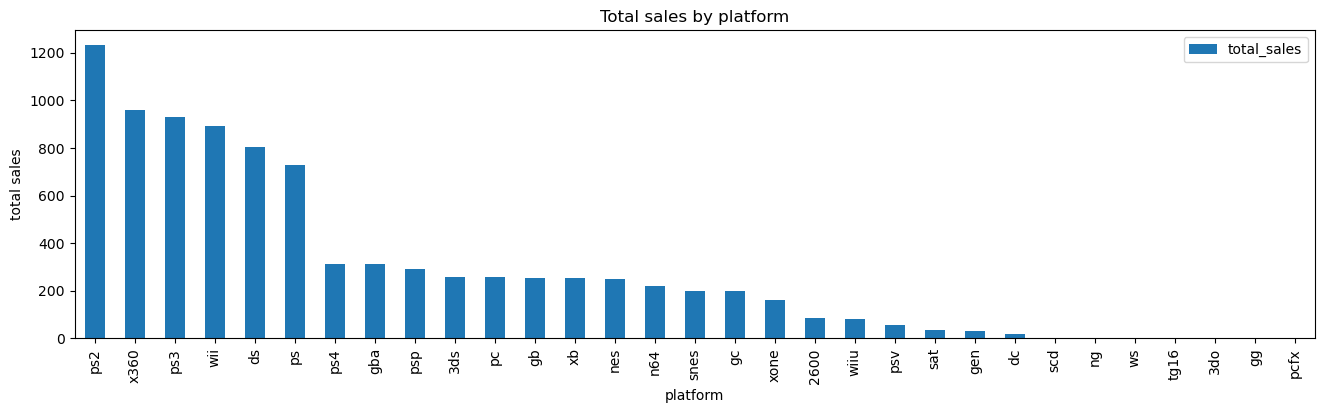

In [22]:
top_platform_total = data.pivot_table(index='platform',
                values='total_sales',
                aggfunc='sum').sort_values(by='total_sales',ascending=False)
top_platform_total.plot(kind='bar',figsize=(16,4));

plt.title("Total sales by platform")
plt.xlabel("platform")
plt.ylabel("total sales");



Для анализа возьму первые семь платформ с наибольшими суммарными продажами (пусть PS4 тоже останется, поскольку дальше нужно будет посмотреть за какой характерный срок появляются новые и исчезают старые платформы)

In [23]:
top_platform_total = top_platform_total.head(7).reset_index()


In [24]:
#Платформа DS была выпущена на рынок только в 2004 году, найду аномальные данные за 1985 год:
display(data.query('platform == "ds" and year_of_release == 1985'))
# Проверю что игра с таким названием только одна и после удалю отфильтровав по названию:
display(data.query('name == "strongest tokyo university shogi ds"'))
#Удалю эту строку:
data = data.query('name != "strongest tokyo university shogi ds"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,NaN,NaN,no rating,0.02


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,NaN,NaN,no rating,0.02


В цикле построю графики суммарного количества продаж по годам для каждой из топ 7 платформ:

In [25]:
display(data.query('name == "strongest tokyo university shogi ds"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


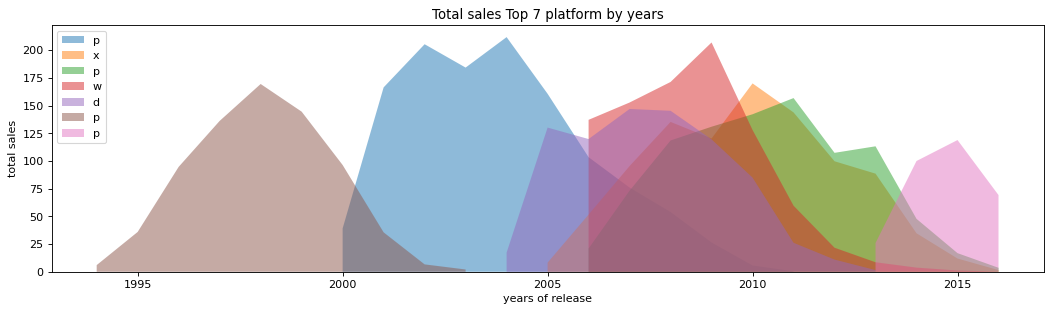

In [26]:
plt.figure(figsize=(16,4), dpi= 80)
for platform in top_platform_total['platform']:
    df = data.query('platform == @platform').pivot_table(index='year_of_release',
                                             values='total_sales',
                                             aggfunc='sum').reset_index()
    plt.stackplot(df['year_of_release'],df['total_sales'], labels=platform, alpha=0.5)
    
plt.title("Total sales Top 7 platform by years")
plt.xlabel("years of release")
plt.ylabel("total sales")
plt.legend(loc='upper left') ;   
    

На примере PS/PS2/PS3/PS4 видно, что платформа живет примерно 10 лет, а примерно через 7 лет после старта появляется выходит следующая версия платформы и постепенно забирает продажи старой. 

Поскольку нам необходимо построить прогноз на 2017 год, то логично использовать данные для актуальных в  2017(следующем) году платформ. Ранее было определено, что старые платформы исчезают через 10 лет после релиза, а через 7 лет после релиза, в продажу поступает новое поколение платформ, пик популяности приходится примерно на середину срока жизни платформы. Поэтому для анализа далее будем использовать только данные с 2014 года и позже.

In [27]:
data = data.query('year_of_release > 2013')

##### Выбор  потенциально прибыльных платформ<a id="section_3_4"></a>

Чтобы определить какие платформы лидируют по продажам, растут или падают, построю графики суммарного количества продаж по годам для каждой из топ 7 платформ для актуального периода:

In [28]:
last_years_top = data.pivot_table(index='platform',
                values='total_sales',
                aggfunc='sum').sort_values(by='total_sales',ascending=False).reset_index()

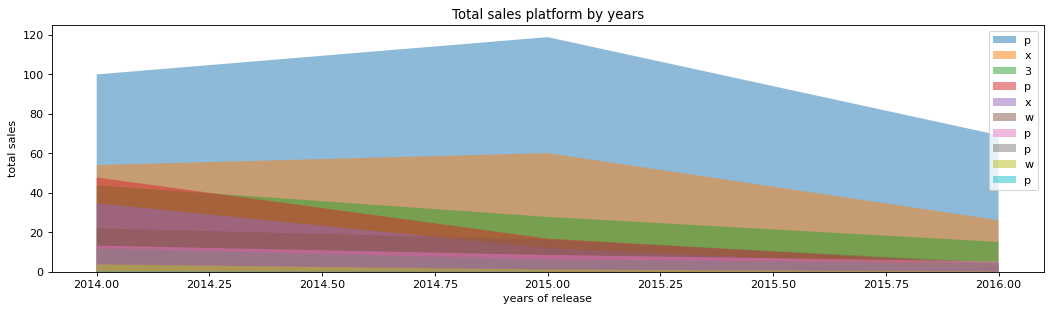

In [29]:
plt.figure(figsize=(16,4), dpi= 80)
for platform in last_years_top['platform']:
    df = data.query('platform == @platform').pivot_table(index='year_of_release',
                                             values='total_sales',
                                             aggfunc='sum').reset_index()
    plt.stackplot(df['year_of_release'],df['total_sales'], labels=platform, alpha=0.5)

plt.title("Total sales platform by years")
plt.xlabel("years of release")
plt.ylabel("total sales")
plt.legend(loc='best') ;  

C учетом того что данные за 2016 год неполные, из графиков видно, что PS4 и XOne растут в продажах, а вот остальные платформы теряют. При этом глобальные продажи этих платформ сильно превосходят остальные.

Построю график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

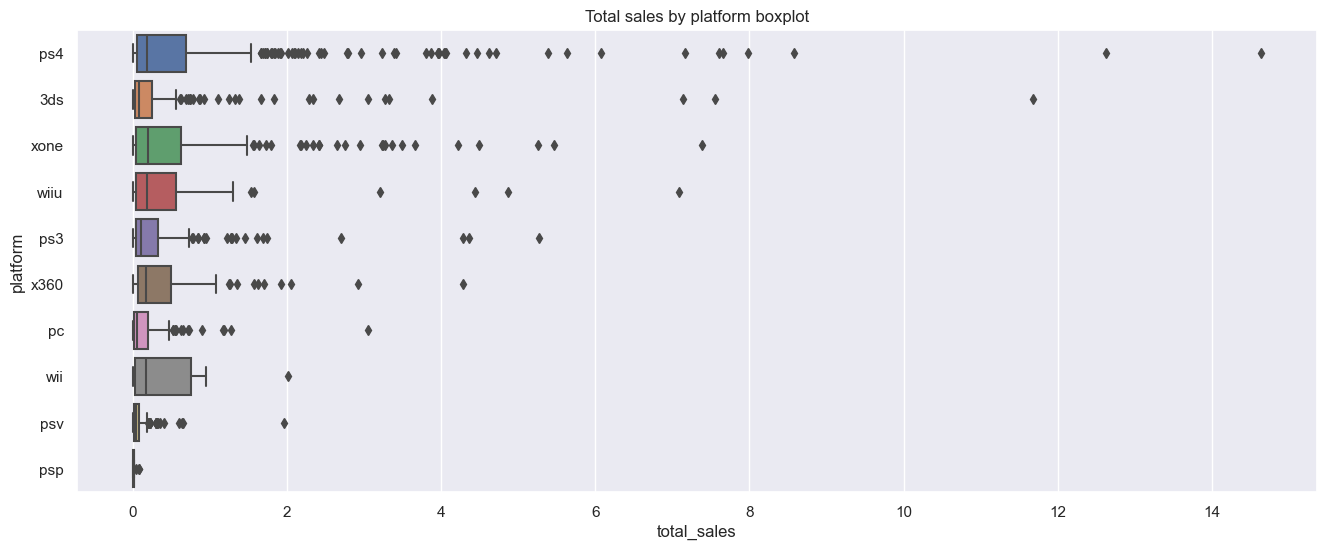

In [30]:
sns.set(rc={'figure.figsize':(16,6)})
sns.boxplot(y="platform", x="total_sales",
            data=data[data.platform.isin(last_years_top.platform)],width=0.8, orient="h");

plt.title("Total sales by platform boxplot"); 

Из графика видно, что для большинства платформ есть игры которые продаются гораздо лучше средних продаж по платформам, о чем свидетельствуют правые выбросы.

Поскольку, на этом графике не видны медиана и 75% квантиль построю  дополнительный график, где будет отображена только нижняя часть boxplot-ов:

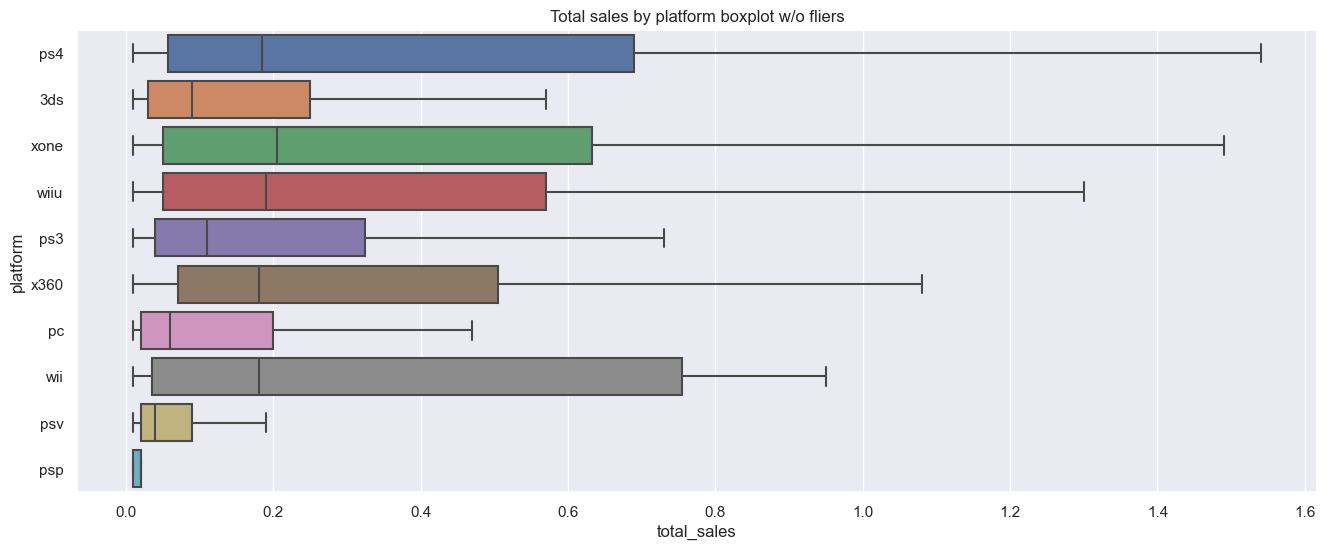

In [31]:
sns.set(rc={'figure.figsize':(16,6)})
sns.boxplot(y="platform", x="total_sales",
            data=data[data.platform.isin(last_years_top.platform)],width=0.8, orient="h",showfliers=False);
plt.title("Total sales by platform boxplot w/o fliers"); 

 Медианные значения продаж для платформ 'ps4', 'xone', 'wiiu', 'x360' и 'wii' - примерно равны и составляют около 0.2 млн копий, для других платформ ('3ds','ps3','pc','psv','psp') - значительно ниже.
 
 Значения 75% квантилей почто для всех платформ смещены в право, что говорит о том, что средние значения продаж здесь будут выше медианных, особенно это характерно для платформ 'wii','ps4','xone','wiiu' ,'x360'.

##### Влияние  отзывов пользователей и критиков на продажи <a id="section_3_5"></a>

Посмотрю, как влияют на продажи отзывы пользователей и критиков на примере одной популярной платформы, для этого построю диаграмму рассеяния: 

In [32]:
data_ps4 = data.query('platform == "ps4"')

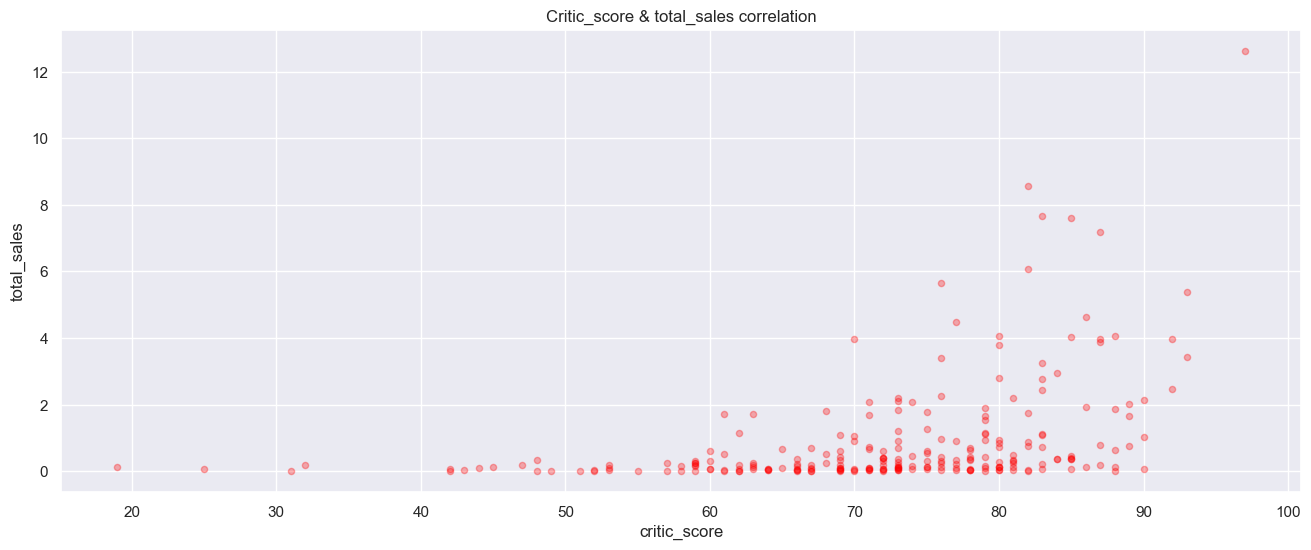

In [33]:
data_ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3,color='red');
plt.title("Critic_score & total_sales correlation");

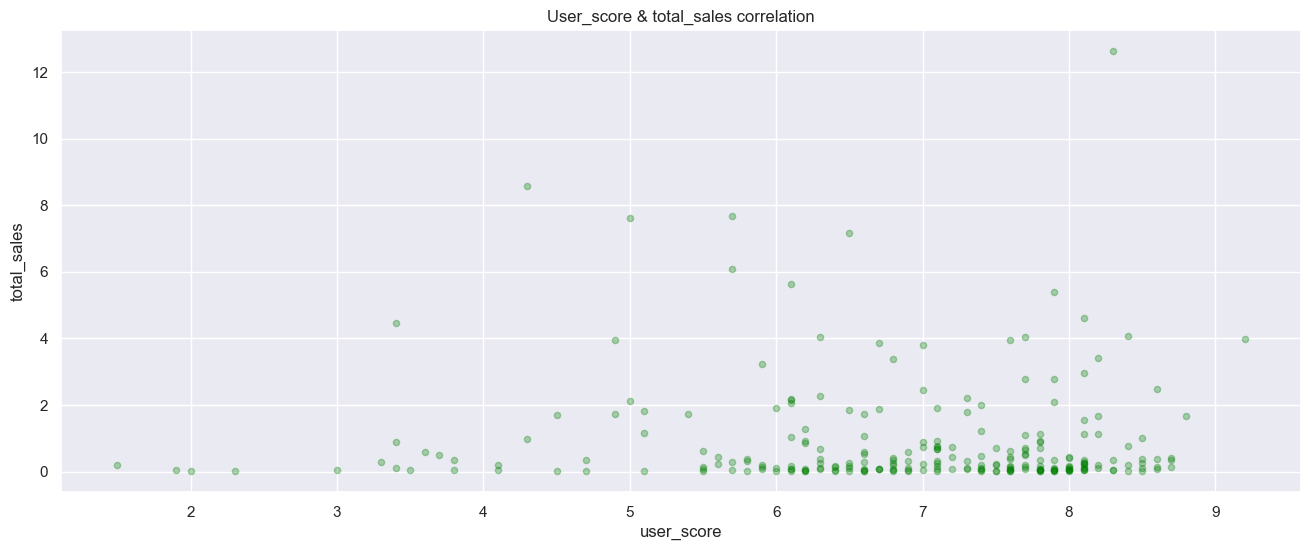

In [34]:
data_ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3,color='green');
plt.title("User_score & total_sales correlation");

Посчитаю корреляцию между отзывами и продажами:

In [35]:
print('critic_score',data_ps4['total_sales'].corr(data_ps4['critic_score']))
print('user_score',data_ps4['total_sales'].corr(data_ps4['user_score']))

critic_score 0.40266141068104094
user_score -0.04013158947269733


Проверю подтвердятся ли подобные взаимосвязи для нескольких платформ конкурентов(ps3, xone, 3ds):

In [36]:
platforms = ['ps3', 'xone', '3ds']
for p in platforms:
    data_platform = data.query('platform == @p') 
    print('For platform',p,':')
    print(' - critic_score',data_platform['total_sales'].corr(data_platform['critic_score']))
    print(' - user_score',data_platform['total_sales'].corr(data_platform['user_score']))

For platform ps3 :
 - critic_score 0.44657460493190704
 - user_score -0.16676141347662116
For platform xone :
 - critic_score 0.42867694370333187
 - user_score -0.07038392806475809
For platform 3ds :
 - critic_score 0.31411749286905105
 - user_score 0.2151932718527028


На графиках видно, что достаточно много игр с высокой оценкой критиков и слабой выручкой, при этом коэффициент корреляции говорит о слабой прямой линейной связи. Оценка пользователями игр ('user_score') никак не связана с количеством проданных копий судя по коэффициенту, либо у этой связи более сложный, нелинейный характер.
Возможно пользователи более критичны к играм, чем критики, но оценить какие действия повлияли на рост продаж не предствляется возможным из за ограниченности имеющихся данных. 

##### Общее распределение игр по жанрам, самые прибыльные жанры<a id="section_3_6"></a>

Посмотрю на общее распределение игр по жанрам:

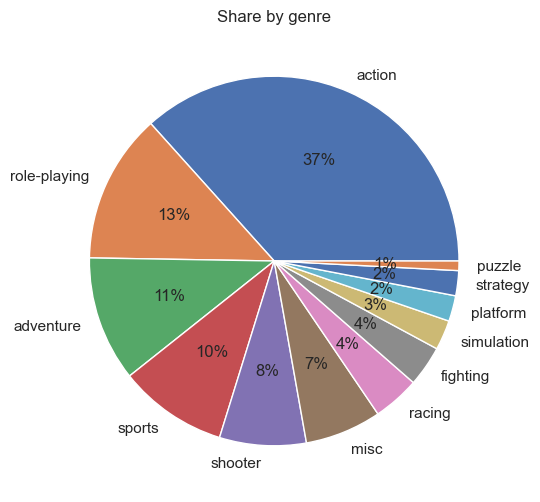

In [37]:
data.genre.value_counts().plot(kind='pie', autopct = '%.0f%%', ylabel = '')
plt.title("Share by genre");

Больше трети всех игр производится в жанре Action, другие наиболее популярные жанры среди производителей игр:  Role-Playing, Adventure, Misc, Sports и Shooter.

Что можно сказать о самых прибыльных жанрах?

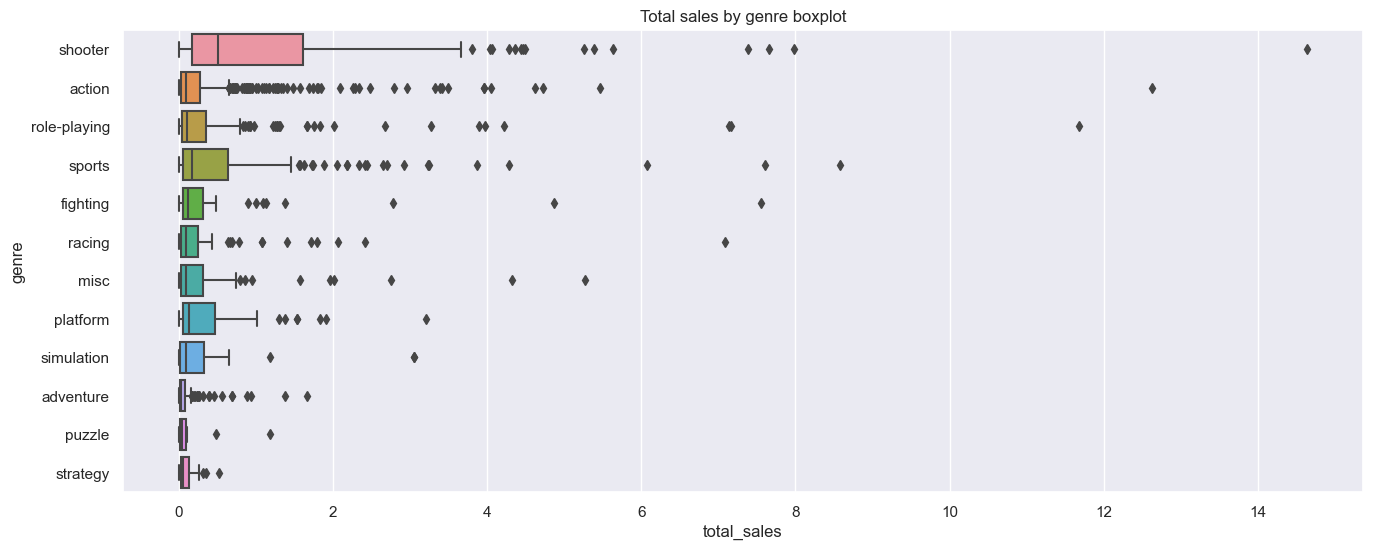

In [38]:
sns.boxplot(y="genre", x="total_sales",
            data=data,width=0.8, orient="h");
plt.title("Total sales by genre boxplot"); 

In [39]:
data.query('total_sales > 12')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,no rating,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62


In [40]:
12.62 / data.query('genre == "action"').total_sales.median()

140.22222222222223

Выбросы на диаграмме размаха показывают насколько успешны могут быть отдельные игры в своих жанрах и как сильно продажи таких игр могут отличаться от средних показателей по жанрам. Например grand theft auto v была продана 12.62 млн раз, что в  140 раз больше чем медианное значение продаж в этом жанре. 

Чтобы детальнее оценить игры каких жанров в среднем продаются лучше других, построю диаграмму размаха без выбросов:

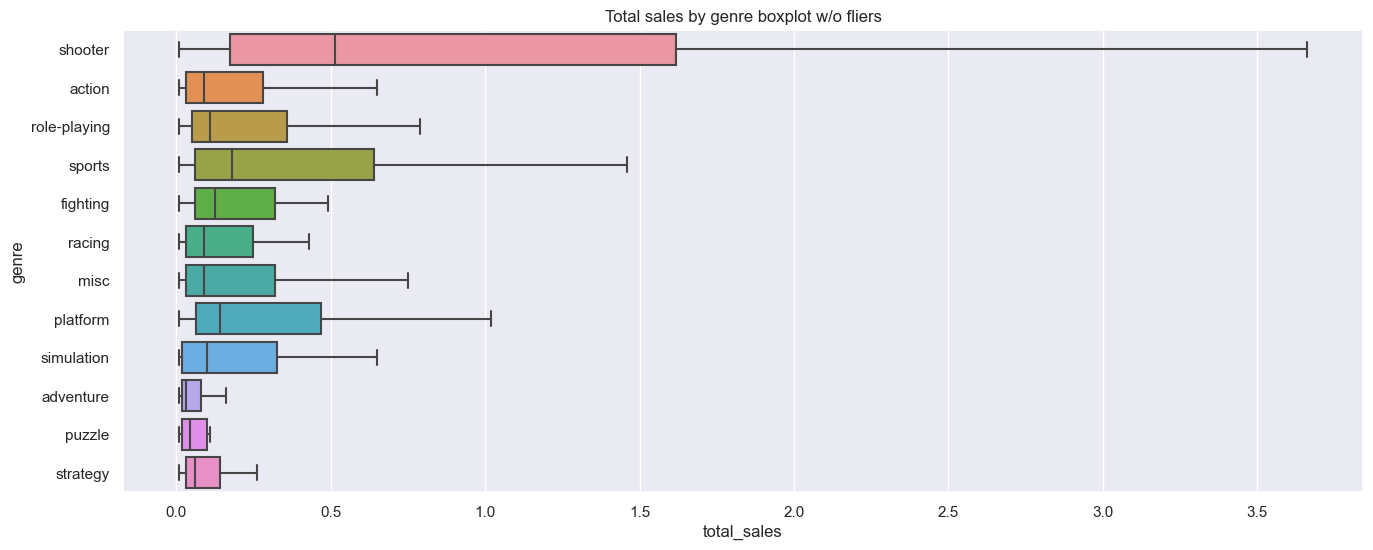

In [41]:
sns.boxplot(y="genre", x="total_sales",
            data=data,width=0.8, orient="h",showfliers=False);
plt.title("Total sales by genre boxplot w/o fliers");

График показывает что половина всех игр жанра shooter продаются тиражем более 0.5 млн копий, а еще четверть от 0.5 до более чем 1.5 млн копий. 

Для игр остальных жанров медиана не превышает 0.2 млн копий. Коробки боксплотов для игр почти всех жанров вытянуты вправо, что говорит о том что среднее значение количетва проданных копий превосходят медианные значения. 

**Вывод:**

Более 75 процентов всех игр из датасета были выпущены после 2002 года. Платформа живет примерно 10 лет, а примерно через 7 лет после старта появляется выходит следующая версия платформы и постепенно забирает продажи старой. Для анализа решено использовать только данные с 2014 года и позже.

C учетом того что данные за 2016 год неполные, из графиков видно, что платформы PS4 и XOne растут в продажах, а вот остальные платформы теряют. При этом глобальные продажи этих платформ сильно превосходят остальные.

Анализ графиков показал, что достаточно много игр с высокой оценкой критиков и слабой выручкой, при этом коэффициент корреляции говорит о слабой прямой линейной связи. Оценка пользователями игр ('user_score') никак не связана с количеством проданных копий судя по коэффициенту. Возможно пользователи более критичны к играм, чем критики, но оценить какие действия повлияли на рост продаж не предствляется возможным из за ограниченности имеющихся данных.

Больше трети всех игр производится в жанре Action, другие наиболее популярные среди разработчиков жанры: Role-Playing, Adventure, Misc, Sports и Shooter. 

Но самыми успешными с точки зрения проданных количеств оказались игр жанра shooter.
Половина всех игр этого жанра продаются тиражем более 0.5 млн копий, а еще четверть от 0.5 до более чем 1.5 млн копий.
Для игр остальных жанров медиана не превышает 0.2 млн копий. Коробки боксплотов для игр почти всех жанров вытянуты вправо, что говорит о том что среднее значение количетва проданных копий превосходят медианные значения.

Оценка выбросов на диаграмме размаха показала насколько успешными могут быть отдельные игры в своих жанрах и как сильно продажи таких игр могут отличаться от медианных показателей продаж по жанрам. Например игра жантра Action - grand theft auto v была продана 12.62 млн раз, что в 140 раз больше чем медианное значение продаж в этом жанре.


### Портрет пользователя каждого региона<a id="chapter4"></a>

##### Популярные платформы среди пользователей каждого региона (NA, EU, JP)<a id="section_4_1"></a>

Объединю платформы не входящие в топ-5 в категорию другие, для этого создам функцию:

In [42]:
# функция принимает значение стоки из столбца платформа и возвращает 
# это же значение, если эта платформа входит в топ5 и 'other' если значение не входит в топ 5: 
def platform_rename(row):
   
    if row['platform'] in platform_list:
        return row['platform']
    
    return 'other'

Использую созданную функцию в цикле запишу в словарь данные по подажам платформ в каждом регионе:

In [43]:
regione_name = ['na_sales','eu_sales','jp_sales']
result={}

for name in regione_name:
    region_platform_top_five = data.pivot_table(index='platform',
                                           values=name,
                                           aggfunc='sum').sort_values(by=name,
                                                                      ascending=False).head().reset_index()
    platform_list = region_platform_top_five.platform.unique()
    region_by_platform = data.pivot_table(index='platform',values=name,
                                        aggfunc='sum').reset_index()
    region_by_platform['platform_rename'] = region_by_platform.apply(platform_rename,axis=1)
    region_by_platform = region_by_platform[[name,'platform_rename']]
    
    result[name]=region_by_platform

Сгруппирую данные по платформам и построю круговые диаграммы продаж для каждого региона:

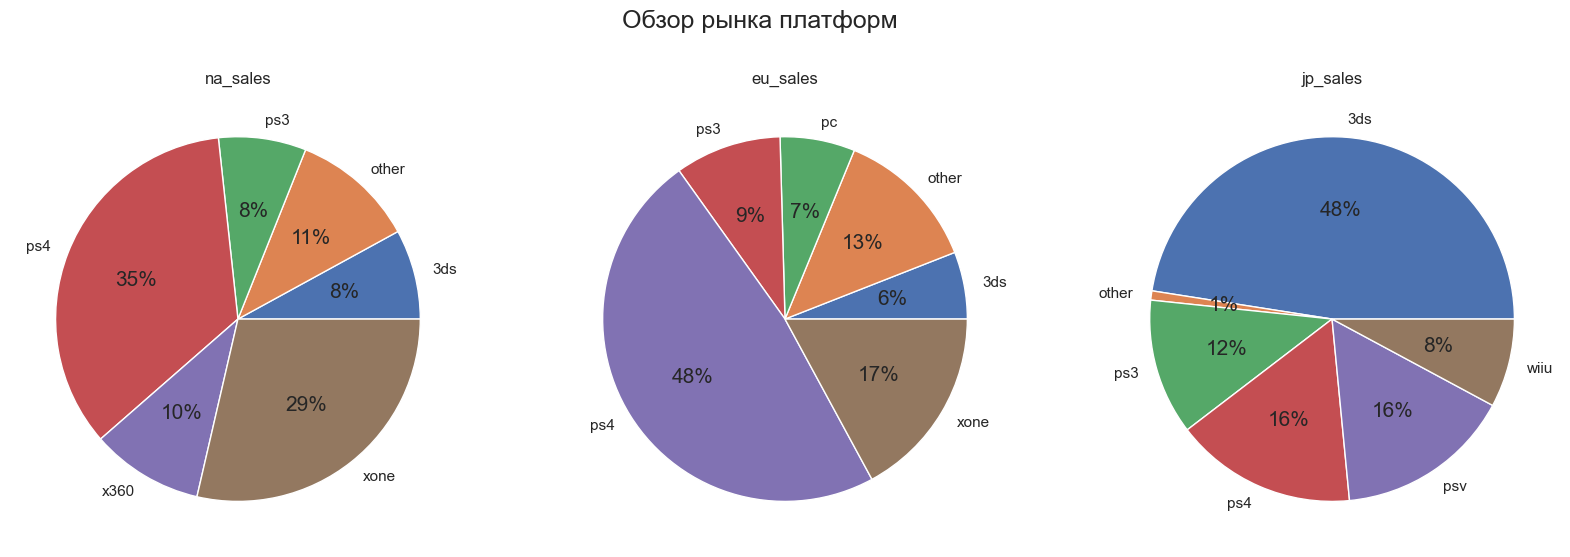

In [44]:
fig, (ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3,figsize=(20,20))
 
plt.rc('font', size= 15 )
 
fig. suptitle('Обзор рынка платформ',y=0.65)
 
result['na_sales'].pivot_table(index='platform_rename',values='na_sales',aggfunc='sum')\
.plot(kind='pie',y='na_sales', legend=False, autopct='%.0f%%', title='na_sales',ax=ax0)
ax0.set(ylabel='')
 
result['eu_sales'].pivot_table(index='platform_rename',values='eu_sales',aggfunc='sum')\
.plot(kind='pie',y='eu_sales',legend=False, autopct='%.0f%%', title='eu_sales',ax=ax1)
ax1.set(ylabel='')
 
result['jp_sales'].pivot_table(index='platform_rename',values='jp_sales',aggfunc='sum')\
.plot(kind='pie',y='jp_sales',legend=False, autopct='%.0f%%', title='jp_sales',ax=ax2)
ax2.set(ylabel='')
 
plt.show()

   Для региона Северная Америка самыми популярными являются игровые платформы PS4 и XOne, PS4 с небольшим отрывом лидирует, а в целом количество проданных игр для этих платформ составляет 70 процентов всех проданных игр в этом регионе. 10 процентов игр - x360 , далее PS3 и 3DS по 8 процентов и 11 процента остальные платформы.
   
   В Европейском регионе количество игр на PS4 равно половине всего рынка региона, XOne - 17 процентов, PS3, PC и 3DS 9, 7 и 6 процентов соответственно, а на остальные платформы приходится 13 процентов.
   
   Рынок Японии кардинально отличается от вышеописанных: - 41 процент проданных игр для платформы 3DS, далее идут PSV, PS4 - по 16 процентов, затем PS3 и WiiU - 12 и 8 процентов соответственно, остальные игры всместе взятые - 1 процент.
   

##### Самые популярные жанры для каждого региона (NA, EU, JP)<a id="section_4_2"></a>

Объединю жанры не входящие в топ-5 в категорию другие, для этого создам функцию, с помощью которой в цикле запишу в словарь данные по подажам игр разных жанров в каждом регионе:

In [45]:
def genre_rename(row):
   
    if row['genre'] in platform_list:
        return row['genre']
    
    return 'other'

regione_name = ['na_sales','eu_sales','jp_sales']
result_genre={}

for name in regione_name:
    region_genre_top_five = data.pivot_table(index='genre',
                                           values=name,
                                           aggfunc='sum').sort_values(by=name,
                                                                      ascending=False).head().reset_index()
    platform_list = region_genre_top_five.genre.unique()
    region_by_genre = data.pivot_table(index='genre',values=name,
                                        aggfunc='sum').reset_index()
    region_by_genre['genre_rename'] = region_by_genre.apply(genre_rename,axis=1)
    region_by_genre = region_by_genre[[name,'genre_rename']]
    
    result_genre[name]=region_by_genre

Сгруппирую данные по жанрам и построю круговые диаграммы для каждого региона:

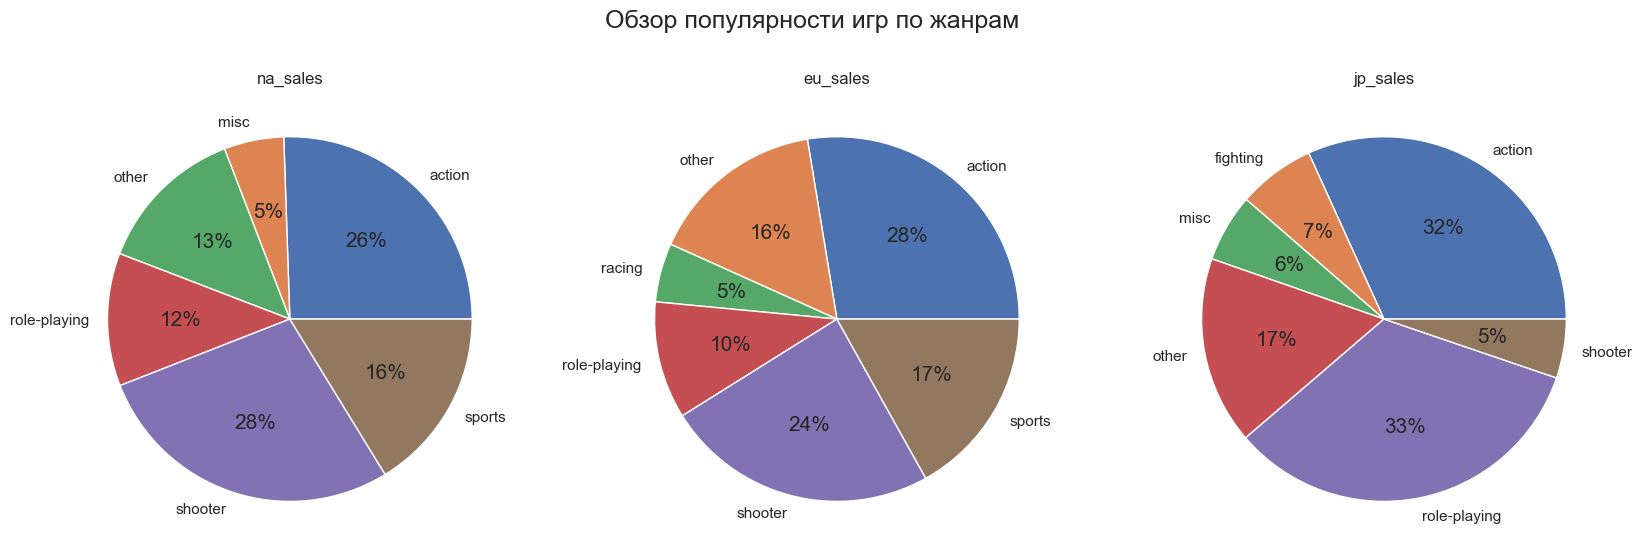

In [46]:
fig, (ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3,figsize=(20,20))
 
plt.rc('font', size= 15 )
 
fig. suptitle('Обзор популярности игр по жанрам',y=0.65)
 
result_genre['na_sales'].pivot_table(index='genre_rename',values='na_sales',aggfunc='sum')\
.plot(kind='pie',y='na_sales', legend=False, autopct='%.0f%%', title='na_sales',ax=ax0)
ax0.set(ylabel='')
 
result_genre['eu_sales'].pivot_table(index='genre_rename',values='eu_sales',aggfunc='sum')\
.plot(kind='pie',y='eu_sales',legend=False, autopct='%.0f%%', title='eu_sales',ax=ax1)
ax1.set(ylabel='')
 
result_genre['jp_sales'].pivot_table(index='genre_rename',values='jp_sales',aggfunc='sum')\
.plot(kind='pie',y='jp_sales',legend=False, autopct='%.0f%%', title='jp_sales',ax=ax2)
ax2.set(ylabel='')
 
plt.show()

Из диаграмм видно что рынки Европы и Северной Америки в разрезе популярности жанров практически не отличаются, самые популярные жанры здесь: 
'Action' и 'Shooter'- почти по 30 процентов рынка, причем в Северной Америке 'Shooter' немного опережают 'Action', в Европе наоборот. На третьем месте игры жанра 'Sports' - около 20 процентов рынка.

В Японии же треть проданных игр  - жанра 'Role-Playing'(33%), почти треть -  'Action'(32%), далее 'Misc'(6%), 'Fighting'(7%) и только 5% - 'Shooter', оставшиеся 17 процентов - другие игры.

##### Влияние рейтинга ESRB на продажи в отдельном регионе<a id="section_4_3"></a>

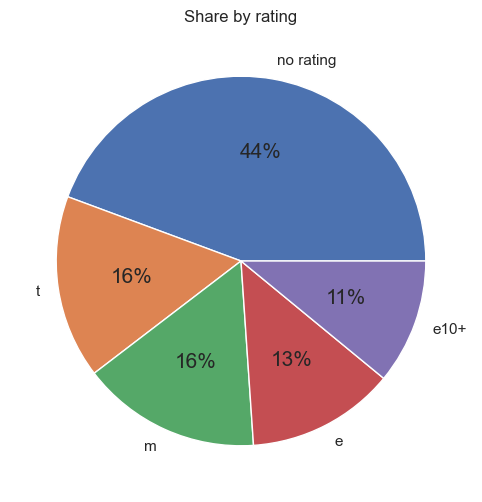

In [47]:
data.rating.value_counts().plot(kind='pie', autopct = '%.0f%%', ylabel = '')
plt.title("Share by rating");

Сгруппирую данные по категориям рейтинга ESRB и проссумирую количества проданных копий игр по регионам: 

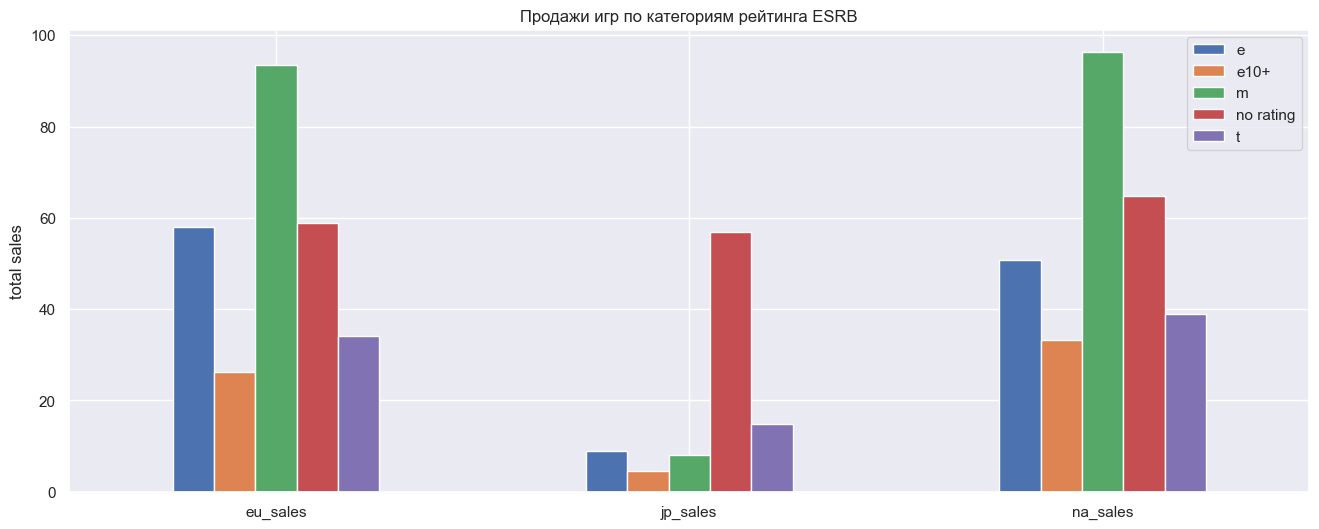

In [48]:
data.pivot_table(index='rating',
                 values=['na_sales','eu_sales','jp_sales'],
                 aggfunc='sum').transpose().plot(kind='bar',rot = -360);
plt.title("Продажи игр по категориям рейтинга ESRB")
plt.ylabel("total sales")
plt.legend(loc='best') ; 


В Европе и Америке игры различных возрастных категорий продаются сходным образом: - игры категории "M"(для взослых)- продаются лучше других, далее идут игры без рейтинга ESRB и с рейтингом "Е"(для всех), затем "Т"(для подростков) и "Е10+".

В Японии ситуация несколько другая: большинство проданных игр не имеют рейтинга ESRBБ, далее идут игры с рейтингом "Т"(для подростков) и игры с рейтингом "Е"(для всех), "M"(для взослых) и "Е10+"(для всех от 10 лет и старше).
    

**Вывод:**

Портреты пользователей обозначенных регионов - различаются. 

Особенно сильно среди других выделяются пользователи региона Япония. 

Когда пользователи из Европы и Северной Америки предпочитают игры жанров 'Shooter' и 'Action' и - почти по 30 процентов рынка и 'Sports' - около 20 процентов рынка, то японские геймеры чаще выбирают игры в жанре'Role-Playing'(33%) и 'Action'(32%) и не попавшие в топ-5 в западных странах - 'Fighting'(7%),  и столь популярные в Европе и Северной Америке игры жанра 'Shooter'- выбирают только 5% японцев.

Касательно игровых платформ тоже есть значительные отличия в предпочтениях, так для региона Северная Америка самыми популярными являются игровые платформы PS4 и XOne, PS4 с небольшим отрывом лидирует, а в целом количество проданных игр для этих платформ составляет 70 процентов всех проданных игр в этом регионе. 10 процентов игр - x360 , далее PS3 и 3DS по 8 процентов и 11 процентов остальные платформы суммарно.

В Европейском регионе количество игр на PS4 равно половине всего рынка региона, XOne - 17 процентов, PS3, PC и 3DS 9, 7 и 6 процентов соответственно, а на остальные платформы приходится 13 процентов.

Рынок Японии кардинально отличается от вышеописанных: - 41 процент проданных игр для платформы 3DS, далее идут PSV, PS4 - по 16 процентов, затем PS3 и WiiU - 12 и 8 процентов соответственно, остальные игры всместе взятые - 1 процент.

Рейтинг ESRB также влияет на продажи: 
в Европе и Америке игры различных возрастных категорий продаются сходным образом: - игры категории "M"(для взослых)- продаются лучше других, далее идут игры без рейтинга ESRB и с рейтингом "Е"(для всех), затем "Т"(для подростков) и "Е10+", а в  Японии ситуация несколько другая: большинство проданных игр не имеют рейтинга ESRBБ, далее идут игры с рейтингом "Т"(для подростков) и игры с рейтингом "Е"(для всех), "M"(для взослых) и "Е10+"(для всех от 10 лет и старше).

### Проверка гипотез<a id="chapter5"></a>

Необходимо проверить гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, для
проверки буду использовать специальный метод Python - scipy.stats.ttest_ind(array1, array2, equal_var).

##### Пользовательские рейтинги платформ Xbox One и PC одинаковые<a id="section_5_1"></a>

Отфильтрую данные по нужным платформам:

In [49]:
data.dropna(subset=['user_score'], inplace=True)

In [50]:
XOne_user_score = data.query('platform == "xone"')
PC_user_score = data.query('platform == "pc"')

Сформулирую **нулевую гиппотезу** так:
- средние пользовательские рейтинги платформ Xbox One и PC равны, 

а **альтернативная гиппотеза** будет двусторонней: 
- средние пользовательские рейтинги платформ Xbox One и PC не равны.

Выполню статистический тест, чтобы проверить достаточно ли большое различие мы наблюдаем в средних значениях помесячной выручки с учётом разброса.

Уровень статистической значимости - alpha = 0.05, если p-value окажется меньше него, отвергну нулевую гипотезу

In [51]:
alpha = 0.05 

results = st.ttest_ind(XOne_user_score['user_score'], PC_user_score['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


p-значение 0.1045, означачет, что при условии что нулевая гипотеза верна, с вероятностью 10,5 процентов мы получим наблюдаемое на выборке значение или более далёкое от предположенного в нулевой гипотезе.

Поскольку p-value больше уровня стат. значимости, — данные не дают основания отвергнуть предположение что средние пользовательские рейтинги платформ Xbox One и PC равны.

##### Пользовательские рейтинги жанров Action  и Sports  - разные<a id="section_5_2"></a>

Подготовлю два набора данных по заданным жанрам:

In [52]:
action_user_score = data.query('genre == "action"')
sports_user_score = data.query('genre == "sports"')

Нулевая гиппотеза:

 - средние пользовательские рейтинги жанров Action и Sports равны,

альтернативная гиппотеза:

- средние пользовательские рейтинги жанров Action и Sports не равны.

Выполню статистический тест, чтобы проверить достаточно ли большое различие мы наблюдаем в средних значениях помесячной выручки с учётом разброса, чтобы отвергнуть нулевую гипотезу об их равенстве.

Уровень статистической значимости - alpha = 0.05, если p-value окажется меньше него, отвергну нулевую гипотезу

In [53]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(action_user_score['user_score'], sports_user_score['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Статистический тест говорит нам о том что разность между средними значениями совокупностей пользовательских рейтингов жанров Action и Sports значимо отличается от нуля и не случайна. Нулевая гиппотеза отвергается в пользу альтернативной: «Средние пользовательские рейтинги жанров Action и Sports не равны».

### Общий вывод и рекомендации<a id="chapter6"></a>

В рамках работы было необходимо **выявить формирующие успешность игр закономерности** для определения потенциально популярных продуктов в 2017 году.

Для анализа использовались данные из открытых источников - исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.
 

В рамках предобработки данных были **удалены пропуски** в столбцах  'name' и 'year_of_release'. Пропуски в столбце 'rating' - были заполнены. Причины пропусков данных в столбцах 'critic_score' и 'user_score' выявить не удалось, пропуски в этих столбах были оставлены. Явных дубликатов в данных обнаружено не было. Была проведена проверка на  дубликаты по сумме параметров ('name', 'platform', 'year_of_release') - выявленные **неявные дубликаты были удалены**. В столбцах 'user_score' и 'year_of_release'был **изменен тип данных**.

В ходе исследовательского анализи данных выявлено следующее:

**Более 75 процентов всех игр были выпущены после 2002 года.**
**Срок жизни** современной игровой **платформы  около 10 лет**, а примерно через 7 лет после старта появляется выходит следующая версия платформы и постепенно забирает продажи старой.

Платформы PS4 и XOne растут в продажах, а вот остальные платформы теряют. При этом глобальные продажи этих платформ сильно превосходят остальные.

Анализ графиков показал, что достаточно много игр с высокой оценкой критиков и слабой выручкой, при этом коэффициент корреляции говорит о слабой прямой линейной связи. Оценка пользователями игр ('user_score') никак не связана с количеством проданных копий судя по коэффициенту. Возможно пользователи более критичны к играм, чем критики, но оценить какие действия повлияли на рост продаж не предствляется возможным из за ограниченности имеющихся данных.

**Больше трети всех игр** производится **в жанре action**, другие наиболее популярные среди разработчиков жанры: Role-Playing, Adventure, Misc, Sports и Shooter.

Но **самыми успешными** с точки зрения проданных количеств **оказались игры жанра shooter**. Половина всех игр этого жанра продаются тиражем более 0.5 млн копий, а еще четверть от 0.5 до более чем 1.5 млн копий. Для игр остальных жанров медиана не превышает 0.2 млн копий. Коробки боксплотов для игр почти всех жанров вытянуты вправо, что говорит о том что среднее значение количетва проданных копий превосходят медианные значения.

Оценка выбросов на диаграмме размаха показала насколько успешными могут быть отдельные игры в своих жанрах и как сильно продажи таких игр могут отличаться от медианных показателей продаж по жанрам. Например игра жантра action - grand theft auto v была продана 12.62 млн раз, что в 140 раз больше чем медианное значение продаж в этом жанре.

**Портреты пользователей** обозначенных регионов - **различаются**. Особенно сильно среди других выделяются пользователи региона Япония.Особенно сильно среди других выделяются пользователи региона Япония.

Когда **пользователи из Европы и Северной Америки предпочитают игры жанров 'Shooter' и 'Action'** и - почти по 30 процентов рынка **и 'Sports'** - около 20 процентов рынка, то ***японские геймеры** чаще выбирают **игры в жанре'Role-Playing'(33%) и 'Action'(32%)** и не попавшие в топ-5 в западных странах - 'Fighting'(7%), и столь популярные в Европе и Северной Америке игры жанра 'Shooter'- выбирают только 5% японцев.

Касательно игровых платформ тоже есть значительные отличия в предпочтениях, так **для региона Северная Америка** самыми **популярными** являются игровые платформы **PS4 и XOne**, PS4 с небольшим отрывом лидирует, а в целом количество проданных игр для этих платформ **составляет 70 процентов** всех проданных игр в этом регионе. 10 процентов игр - x360 , далее PS3 и 3DS по 8 процентов и 11 процентов остальные платформы суммарно.

**В Европейском регионе** количество игр на **PS4 равно половине всего рынка** региона, XOne - 17 процентов, PS3, PC и 3DS 9, 7 и 6 процентов соответственно, а на остальные платформы приходится 13 процентов.

Рынок **Японии** кардинально отличается от вышеописанных: - **41 процент проданных игр для платформы 3DS**, далее идут PSV, PS4 - по 16 процентов, затем PS3 и WiiU - 12 и 8 процентов соответственно, остальные игры всместе взятые - 1 процент.

**Рейтинг ESRB** также **влияет на продажи: в Европе и Америке** игры различных возрастных категорий продаются сходным образом: - **игры категории "M"(для взослых)- продаются лучше других**, далее идут игры без рейтинга ESRB и с рейтингом "Е"(для всех), затем "Т"(для подростков) и "Е10+", а **в Японии** ситуация несколько другая: **большинство проданных игр не имеют рейтинга ESRB**, далее идут игры с рейтингом "Т"(для подростков) и игры с рейтингом "Е"(для всех), "M"(для взослых) и "Е10+"(для всех от 10 лет и старше).

Были выполнены статистические тесты, для проверки гиппотез:

С уровенем статистической значимости 5% было доказано что данные не дают основания отвергнуть предположение что средние пользовательские рейтинги платформ Xbox One и PC равны. Также было проверено что средние пользовательские рейтинги жанров Action и Sports не равны.


**Рекомендации:**

Наиболее высоким потенциалом к продажам в регионах Северная Америка и Европа в 2017 году будут обладать игры в жанрах 'Action', 'Shooter' и 'Sports' для игровых платформ PS4 и XOne, с возрастным ограничением "M"(для взослых).

Для региона Япония следует обратить внимание на игры в жанре 'Role-Playing' и 'Action' для игровой консоли 3DS без рейтинга ESRB.